In [ ]:
# 2023 测试移动平均线

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
sys.executable
stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
print(stdi, stdo, stde)

'C:\\Users\\Johnson\\Anaconda2\\python.exe'

(<open file '<stdin>', mode 'r' at 0x000000000264B030>, <ipykernel.iostream.OutStream object at 0x00000000045E2F98>, <ipykernel.iostream.OutStream object at 0x00000000046304A8>)


In [4]:
import matplotlib
import matplotlib.pyplot as plt

print(matplotlib.get_backend())
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 指定默认字体为黑体
plt.rcParams["axes.unicode_minus"] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
# %matplotlib widget

module://ipykernel.pylab.backend_inline


In [19]:
def src_step1():
    import sys

    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import tushare as ts

    sys.path.append("..")
    from JSONData import tdx_data_Day as tdd

    # http://stackoverflow.com/questions/21058333/compute-rolling-maximum-drawdown-of-pandas-series
    def max_dd(ser):
        max2here = pd.expanding_max(ser)
        dd2here = ser - max2here
        return dd2here.min()

    np.random.seed(0)
    n = 100
    s = pd.Series(np.random.randn(n).cumsum())
    # s.plot()
    # plt.show()

    code = "999999"
    # d=ts.get_hist_data(code).sort_index()
    # d=tdd.get_tdx_Exp_day_to_df(code, 'f').sort_index()
    data = tdd.get_tdx_Exp_day_to_df("999999", dl=160).sort_index()
    rolling_dd = pd.rolling_apply(data.close, 20, max_dd, min_periods=0)
    df = pd.concat([data.close, rolling_dd], axis=1)
    df.columns = [code, "rol_dd_10"]
    df.plot()

    plt.show()

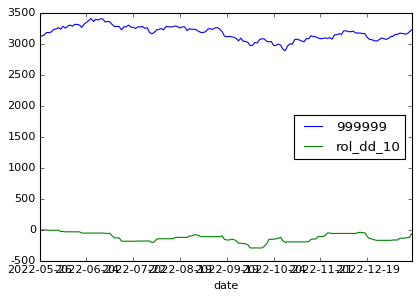

In [20]:
src_step1()

In [7]:
def src_step2():
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from numpy.lib.stride_tricks import as_strided

    def windowed_view(x, window_size):
        """Creat a 2d windowed view of a 1d array.

        `x` must be a 1d numpy array.

        `numpy.lib.stride_tricks.as_strided` is used to create the view.
        The data is not copied.

        Example:

        >>> x = np.array([1, 2, 3, 4, 5, 6])
        >>> windowed_view(x, 3)
        array([[1, 2, 3],
               [2, 3, 4],
               [3, 4, 5],
               [4, 5, 6]])
        """
        y = as_strided(
            x,
            shape=(x.size - window_size + 1, window_size),
            strides=(x.strides[0], x.strides[0]),
        )
        return y

    def rolling_max_dd(x, window_size, min_periods=1):
        """Compute the rolling maximum drawdown of `x`.

        `x` must be a 1d numpy array.
        `min_periods` should satisfy `1 <= min_periods <= window_size`.

        Returns an 1d array with length `len(x) - min_periods + 1`.
        """
        if min_periods < window_size:
            pad = np.empty(window_size - min_periods)
            pad.fill(x[0])
            x = np.concatenate((pad, x))
        y = windowed_view(x, window_size)
        running_max_y = np.maximum.accumulate(y, axis=1)
        dd = y - running_max_y
        return dd.min(axis=1)

    def max_dd(ser):
        max2here = pd.expanding_max(ser)
        dd2here = ser - max2here
        return dd2here.min()

    # if __name__ == "__main__":
    np.random.seed(0)
    n = 100
    s = pd.Series(np.random.randn(n).cumsum())

    window_length = 10

    rolling_dd = pd.rolling_apply(s, window_length, max_dd, min_periods=0)
    df = pd.concat([s, rolling_dd], axis=1)
    df.columns = ["s", "rol_dd_%d" % window_length]
    df.plot(linewidth=3, alpha=0.4)

    my_rmdd = rolling_max_dd(s.values, window_length, min_periods=1)
    plt.plot(my_rmdd, "g.")

    plt.show()

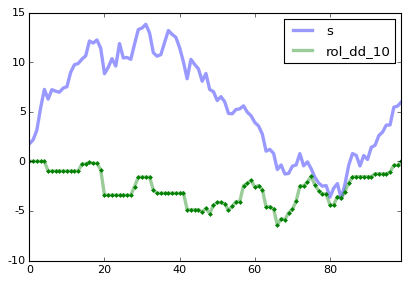

In [8]:
%matplotlib inline
src_step2()